In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, ZeroPadding2D, Dropout, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: c:\Programming\ML\machine-learning\box_assigner\Titanic---project-1


In [21]:
data_genarator = ImageDataGenerator(
    rescale = 1.0/255.0,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 50,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.4,
    fill_mode = 'nearest'
)

data_genarator2 = ImageDataGenerator()

train = data_genarator.flow_from_directory('c:/Programming/ML/machine-learning/box_assigner/PetImages/', class_mode='binary', batch_size=50, target_size=(200,200))

Found 17998 images belonging to 2 classes.


In [22]:
test = data_genarator2.flow_from_directory('c:/Programming/ML/machine-learning/box_assigner/test/', class_mode='binary', batch_size=50, target_size=(200,200))

Found 7000 images belonging to 2 classes.


In [23]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(200,200,3)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\sinah\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │       320,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,897 (1.22 MB)

 Trainable params: 320,897 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics= ['accuracy'])

In [25]:
result = model.fit(train, steps_per_epoch = len(train), validation_data = test, validation_steps = len(test), epochs = 6)

c:\Users\sinah\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
111/360 ━━━━━━━━━━━━━━━━━━━━ 4:03 978ms/step - accuracy: 0.5253 - loss: 1.7894

c:\Users\sinah\anaconda\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


360/360 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.5825 - loss: 0.7824 - val_accuracy: 0.5777 - val_loss: 55.3107
Epoch 2/6
360/360 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.6144 - loss: 0.6534 - val_accuracy: 0.5593 - val_loss: 71.6891
Epoch 3/6
360/360 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - accuracy: 0.6111 - loss: 0.6528 - val_accuracy: 0.5839 - val_loss: 65.4940
Epoch 4/6
360/360 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - accuracy: 0.6115 - loss: 0.6545 - val_accuracy: 0.5469 - val_loss: 102.4748
Epoch 5/6
360/360 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.6136 - loss: 0.6562 - val_accuracy: 0.5370 - val_loss: 91.5844
Epoch 6/6
360/360 ━━━━━━━━━━━━━━━━━━━━ 6898s 19s/step - accuracy: 0.6131 - loss: 0.6497 - val_accuracy: 0.5604 - val_loss: 83.2235


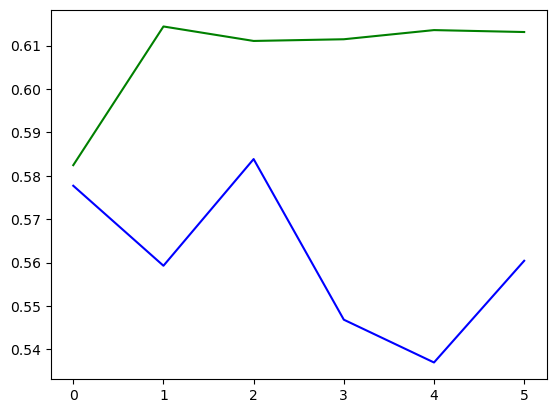

In [28]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'], color='green')
plt.plot(result.history['val_accuracy'], color='blue')
# plt.plot(result.history['loss'], color='red')
# plt.plot(result.history['val_loss'], color='black')
plt.show()



keras.saving.save_model(model, 'catvsdog.keras')